In [2]:
import pandas as pd
import json
import csv
import matplotlib
import matplotlib.pyplot as plt

# pd.set_option('display.max_rows', 10)
# pd.set_option('display.max_columns', 10)

%autosave 20
%matplotlib inline  

Autosaving every 20 seconds


## Load Title File

In [3]:
!ls ../data

films-2020-07-01.json


In [4]:
data_path = '../data/films-2020-07-01.json'

In [5]:
# df = pd.read_json ('../data/films-2020-07-01.json')
# print(df.shape)

In [6]:
# %time
# import json
# import pandas as pd
# with open('../data/films-2020-07-01.json') as json_data:
#    # https://stackoverflow.com/a/21266043/5861873
#    data = json.load(json_data)
#    df = pd.json_normalize(data)
    
# print(df.shape)

In [7]:
# df.head()

In [8]:
%time
import json
import pandas as pd
with open(data_path) as json_data:
   # https://stackoverflow.com/a/41289913/5861873
   data = json.load(json_data)
   df = pd.DataFrame({'item': [x['item']['value'] for x in data], \
                      'title': [x['title']['value'] for x in data], \
                      'published': [x['published']['value'] for x in data]})

print(df.shape)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs
(63807, 3)


In [9]:
df.shape

(63807, 3)

In [10]:
df.head()

,item,title,published
0,http://www.wikidata.org/entity/Q4069062,The Arrest of a Pickpocket,1895-01-01T00:00:00Z
1,http://www.wikidata.org/entity/Q7168279,"Performing Animals; or, Skipping Dogs",1895-01-01T00:00:00Z
2,http://www.wikidata.org/entity/Q2819823,A Morning Alarm,1896-01-01T00:00:00Z
3,http://www.wikidata.org/entity/Q3326074,Mounted Police Charge,1896-01-01T00:00:00Z
4,http://www.wikidata.org/entity/Q3520164,The Burning Stable,1896-01-01T00:00:00Z


## Sanity Check

### null value

In [11]:
df.isnull().sum()

item         0
title        0
published    0
dtype: int64

### duplicates

In [12]:
# there are duplicate items and titles
print(df.shape[0])
print('\n')
print(df.nunique())

63807


item         63754
title        58083
published     7216
dtype: int64


In [13]:
df.groupby(['item'])['title'].count().sort_values(ascending=False).reset_index()

,item,title
0,http://www.wikidata.org/entity/Q6748375,3
1,http://www.wikidata.org/entity/Q20439354,3
2,http://www.wikidata.org/entity/Q501105,2
3,http://www.wikidata.org/entity/Q9358159,2
4,http://www.wikidata.org/entity/Q19365765,2
...,...,...
63749,http://www.wikidata.org/entity/Q54868306,1
63750,http://www.wikidata.org/entity/Q54868305,1
63751,http://www.wikidata.org/entity/Q54868300,1
63752,http://www.wikidata.org/entity/Q54868299,1


#### same film can have different names (a.k.a)

In [14]:
df[df.item=='http://www.wikidata.org/entity/Q6748375']

,item,title,published
25415,http://www.wikidata.org/entity/Q6748375,Island of the Doomed,1967-01-01T00:00:00Z
25416,http://www.wikidata.org/entity/Q6748375,Maneater of Hydra,1967-01-01T00:00:00Z
25417,http://www.wikidata.org/entity/Q6748375,The Blood Suckers,1967-01-01T00:00:00Z


In [15]:
df[df.item=='http://www.wikidata.org/entity/Q20439354']

,item,title,published
26193,http://www.wikidata.org/entity/Q20439354,Cry Chicago,1969-09-22T00:00:00Z
26194,http://www.wikidata.org/entity/Q20439354,The Mafia Mob,1969-09-22T00:00:00Z
26195,http://www.wikidata.org/entity/Q20439354,The True Story of Frank Mannata,1969-09-22T00:00:00Z


In [16]:
item_count = df.groupby(['item'])['title'].count().sort_values(ascending=False).reset_index()

In [17]:
print('{} film have duplicate titles'.format(item_count[item_count.title>1].shape[0]))

51 film have duplicate titles


In [18]:
# set all title values as lower cases
df['title'] = df['title'].str.lower()

In [19]:
df.head()

,item,title,published
0,http://www.wikidata.org/entity/Q4069062,the arrest of a pickpocket,1895-01-01T00:00:00Z
1,http://www.wikidata.org/entity/Q7168279,"performing animals; or, skipping dogs",1895-01-01T00:00:00Z
2,http://www.wikidata.org/entity/Q2819823,a morning alarm,1896-01-01T00:00:00Z
3,http://www.wikidata.org/entity/Q3326074,mounted police charge,1896-01-01T00:00:00Z
4,http://www.wikidata.org/entity/Q3520164,the burning stable,1896-01-01T00:00:00Z


In [20]:
df.groupby(['title'])['item'].count().sort_values(ascending=False).reset_index()

,title,item
0,the outsider,10
1,treasure island,10
2,the three musketeers,10
3,life,9
4,exposed,8
...,...,...
58035,splatter university,1
58036,splatter farm,1
58037,splatter beach,1
58038,splash,1


#### different films can have the same name

In [21]:
df[df.title=='the outsider'].sort_values(by=['published'])

,item,title,published
1698,http://www.wikidata.org/entity/Q56279378,the outsider,1917-01-01T00:00:00Z
5754,http://www.wikidata.org/entity/Q7755697,the outsider,1926-01-01T00:00:00Z
8397,http://www.wikidata.org/entity/Q7755698,the outsider,1931-01-01T00:00:00Z
13609,http://www.wikidata.org/entity/Q7755699,the outsider,1939-01-01T00:00:00Z
23674,http://www.wikidata.org/entity/Q7755700,the outsider,1961-01-01T00:00:00Z
29954,http://www.wikidata.org/entity/Q16931670,the outsider,1980-01-01T00:00:00Z
45040,http://www.wikidata.org/entity/Q56274148,the outsider,2005-01-01T00:00:00Z
57121,http://www.wikidata.org/entity/Q14948583,the outsider,2014-02-07T00:00:00Z
59335,http://www.wikidata.org/entity/Q25111228,the outsider,2016-01-01T00:00:00Z
62403,http://www.wikidata.org/entity/Q23767815,the outsider,2018-03-09T00:00:00Z


In [22]:
df[df.title=='little women'].sort_values(by=['published'])

,item,title,published
1780,http://www.wikidata.org/entity/Q6652563,little women,1917-09-17T00:00:00Z
9877,http://www.wikidata.org/entity/Q195274,little women,1933-11-16T00:00:00Z
18657,http://www.wikidata.org/entity/Q1466426,little women,1949-03-10T00:00:00Z
36722,http://www.wikidata.org/entity/Q850522,little women,1994-12-21T00:00:00Z
62656,http://www.wikidata.org/entity/Q56241200,little women,2018-09-28T00:00:00Z
63560,http://www.wikidata.org/entity/Q56881140,little women,2019-12-25T00:00:00Z


In [23]:
df[df.title=='love'].sort_values(by=['published'])

,item,title,published
2909,http://www.wikidata.org/entity/Q6690230,love,1920-01-01T00:00:00Z
6065,http://www.wikidata.org/entity/Q561162,love,1927-01-01T00:00:00Z
34883,http://www.wikidata.org/entity/Q4271757,love,1991-01-01T00:00:00Z
44746,http://www.wikidata.org/entity/Q6690233,love,2005-01-01T00:00:00Z
52087,http://www.wikidata.org/entity/Q1872389,love,2011-01-01T00:00:00Z
58879,http://www.wikidata.org/entity/Q19829024,love,2015-09-24T00:00:00Z


In [24]:
title_count = df.groupby(['title'])['item'].count().sort_values(ascending=False).reset_index()

In [25]:
title_count[title_count.item==6]

,title,item
18,asylum,6
19,camille,6
20,rage,6
21,king lear,6
22,great expectations,6
23,body and soul,6
24,midnight,6
25,the awakening,6
26,little women,6
27,brothers,6


In [26]:
print('{} film titles have been used more than once'.format(title_count[title_count.item>1].shape[0]))

4226 film titles have been used more than once


## to be continued

In [27]:
hk_list = [title for title in df.title if 'hong kong' in title or 'hongkong' in title]
print(len(hk_list))
hk_list

17


['hong kong nights',
 'passage from hong kong',
 'escape from hong kong',
 'hong kong',
 'target hong kong',
 'flight to hong kong',
 'hong kong confidential',
 'ferry to hong kong',
 'the road to hong kong',
 'a countess from hong kong',
 'the man from hong kong',
 'crazy hong kong',
 'hong kong 97',
 'red trousers – the life of the hong kong stuntmen',
 "jackie chan's hong kong",
 'hong kong confidential',
 'already tomorrow in hong kong']

In [28]:
london_list = [title for title in df.title if 'london' in title]
print(len(london_list))

93


In [29]:
ny_list = [title for title in df.title if 'new york' in title or ' ny' in title or 'nyc' in title or 'newyork' in title]
print(len(ny_list))

103


In [30]:
boy_list = [title for title in df.title if 'boy' in title]
print(len(boy_list))
# boy_list

604


In [31]:
girl_list = [title for title in df.title if 'girl' in title]
print(len(girl_list))
# girl_list

880


In [32]:
[title for title in df.title if '500' in title]

['terror from the year 5000',
 'fireball 500',
 'transylvania 6-5000',
 'chuck e. cheese in the galaxy 5000',
 '500 years later',
 'troop 1500',
 '5000 miles',
 '9500 liberty',
 '(500) days of summer',
 '500 miles north',
 '7500',
 '1500 steps',
 '7500']

In [33]:
day_list = [title for title in df.title if 'day' in title]
len(day_list)

854

In [34]:
[title for title in df.title if 'apple' in title]

['the apple tree girl',
 'bitter apples',
 "adam's apple",
 "the devil's apple tree",
 'captain applejack',
 'aggie appleby maker of men',
 'three bites of the apple',
 'golden apples of the sun',
 'the apple',
 'meet the applegates',
 'god, sex & apple pie',
 'larryboy and the bad apple',
 'pineapple express',
 'red apples falling',
 'adams apples',
 'i love you, apple, i love you, orange',
 'appleseed alpha',
 'applesauce',
 'mapplethorpe: look at the pictures',
 'mapplethorpe']

In [35]:
[title for title in df.title if 'work' in title]

['the patchwork girl of oz',
 'monty works the wires',
 'the fast worker',
 "the girl who wouldn't work",
 'more pay, less work',
 'only saps work',
 'working girls',
 "temptation's workshop",
 'too busy to work',
 'the working man',
 'fast workers',
 'dirty work',
 'shoot the works',
 'danger – love at work',
 'we work again',
 'the man who could work miracles',
 'blondes at work',
 'night work',
 'too busy to work',
 'should husbands work?',
 'genius at work',
 "she's working her way through college",
 "all in a night's work",
 'the miracle worker',
 'afro-american work songs in a texas prison',
 'work is a four-letter word',
 'a clockwork orange',
 'the working girls',
 'network',
 'hardly working',
 'homework',
 "i'm almost not crazy: john cassavetes, the man and his work",
 'the works ep',
 'working girls',
 'killer workout',
 'waxwork',
 'working girl',
 'men at work',
 'h-2 worker',
 'waxwork ii: lost in time',
 'mani madhava chakyar: the master at work',
 'clockwork orgy',
 'cl

In [36]:
[title for title in df.title if 'marriage' in title]

['the marriage of kitty',
 'an international marriage',
 'sold for marriage',
 'her marriage lines',
 'the marriage ring',
 'the marriage lie',
 'marriages are made',
 'the marriage price',
 'marriage for convenience',
 'the marriage of william ashe',
 'the mad marriage',
 'man-woman-marriage',
 'the marriage lines',
 'why announce your marriage?',
 'the marriage chance',
 'the marriage maker',
 'temporary marriage',
 'modern marriage',
 'the marriage circle',
 'so this is marriage?',
 'her marriage vow',
 'the marriage cheat',
 'greater than marriage',
 'if marriage fails',
 'marriage in transit',
 'the marriage whirl',
 'the mad marriage',
 'the marriage clause',
 'the marriage business',
 'marriage',
 'companionate marriage',
 'three-ring marriage',
 'marriage by contract',
 'spite marriage',
 'half marriage',
 'the marriage playground',
 'consolation marriage',
 'the marriage bond',
 'week-end marriage',
 'no marriage ties',
 'the marriage bargain',
 'my marriage',
 'brilliant marr

In [37]:
[title for title in df.title if 'avengers' in title]

['the avengers',
 'the scavengers',
 'avengers of the reef',
 'scavengers',
 'the avengers',
 'ultimate avengers 2',
 'ultimate avengers',
 'next avengers: heroes of tomorrow',
 'avengers xxx – a porn parody',
 'the avengers',
 'avengers grimm',
 'avengers grimm: time wars',
 'bikini avengers',
 'avengers: age of ultron',
 'avengers 4',
 'avengers: infinity war',
 'avengers: endgame']

In [38]:
df["time"] = pd.to_datetime(df['published'])

In [39]:
df_word = df.copy()

In [84]:
words = [
    "old",
    "new",
    "spring", "autumn", 
    "dead", "love", "bad", "good", "hate", "london", 
    "new york", "yes", "no", "dog", "cat",  "summer", 
    "winter", "china", "big", "small"
]

for word in words:
    df_word[word] = [1 if title.find(word) > 0 else 0 for title in df_word.title]

In [74]:
df_word[df_word.china==1]

,item,title,published,time,bad,good,hate,london,new york,love,yes,no,dog,cat,summer,winter,china
801,http://www.wikidata.org/entity/Q19363570,the chinatown mystery,1915-01-01T00:00:00Z,1915-01-01 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,1
5650,http://www.wikidata.org/entity/Q4660345,a trip to chinatown,1926-01-01T00:00:00Z,1926-01-01 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,1
7889,http://www.wikidata.org/entity/Q7775527,the woman from china,1930-01-01T00:00:00Z,1930-01-01 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,1
8648,http://www.wikidata.org/entity/Q28961096,chin chin chinaman,1931-11-01T00:00:00Z,1931-11-01 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,1
10722,http://www.wikidata.org/entity/Q5037095,captured in chinatown,1935-01-01T00:00:00Z,1935-01-01 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,1
10815,http://www.wikidata.org/entity/Q7081402,oil for the lamps of china,1935-01-01T00:00:00Z,1935-01-01 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,1
11644,http://www.wikidata.org/entity/Q10370909,shadow of chinatown,1936-01-01T00:00:00Z,1936-01-01 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,1
11852,http://www.wikidata.org/entity/Q52715809,i cover chinatown,1936-01-01T00:00:00Z,1936-01-01 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,1
13647,http://www.wikidata.org/entity/Q10332948,mr. wong in chinatown,1939-01-01T00:00:00Z,1939-01-01 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,1
13724,http://www.wikidata.org/entity/Q19787274,king of chinatown,1939-01-01T00:00:00Z,1939-01-01 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,1


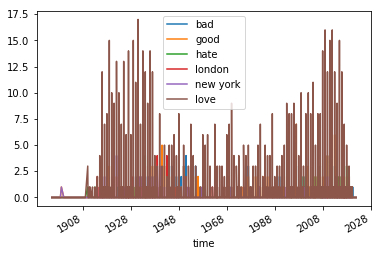

In [65]:
df_word.groupby(['time']).sum().plot()

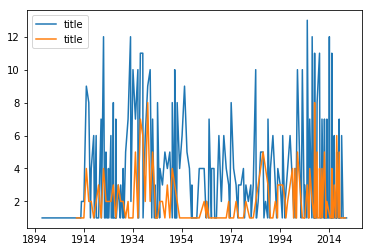

In [86]:
plt.plot(df_word[df_word.old==1].groupby(['time'])['title'].count())
plt.plot(df_word[df_word.new==1].groupby(['time'])['title'].count())
plt.legend()